# Project Title: Analysis of Spotify's Songs Popularity

## Contributor: Grace Pham

#### Abstract
---

In this project, we wanted to look into the direct relationships between different features of the songs and the relationships between songs' features and their Popularity scores. Given the relations, we wanted to give more insightful analysis to explore more about how adjusting the features can affect the popularity scores of the songs as well as what are the features that the majority of popular and hit songs would have.

From this project, we have found that of all 12 features including Genre, Year, BPM, Energy, Danceabily, Loudness, Liveness, Valence, Lenghth, Acousticness, Speechiness, Popularity, there are only 3 direct relations, which are between "Valence" and "Danceability", "Valence" and "Energy", and "Loudness" and "Energy". We also found out the proportion of top 20 most populous genres that the popular and hit songs would have, as well as what is the value of BPM, Energy score, and Loudness (dB) that the majority of popular and hit songs would have. We also visualize the data using best fit lines and bar chart to attempt to give predictions and to find out the trend, relations, and differences in the values of features between 3 categories of popular level of the songs: Normal, Popular, and Hit.

### 1. Introduction
---

Our project will provide investigations about the impacts of songs’ attributes including genre, beats per minute (BPM), energy, danceability, loudness, valence value, etc. on the songs’ popularity. The overall goals of this project are to identify possible connections between songs’ characteristics as well as calculate and visualize the impactfulness of those attributes on the songs’ levels of trending.

The dataset contains 01 file named “Spotify-2000.csv”. This is CSV file of 165.93KB large with 1995 rows and 15 columns. This file includes information and statistics about top 2000 tracks which have been released from 1956 to 2019 and gathered on Spotify. There are a total of 1994 songs recorded. For each song, the dataset keeps track of its index, title, artist, top genre, releasing year, BPM, energy score, danceability score, loudness, liveness, valence score, length, acousticness score, speechiness score, and popularity score. The last update for this dataset is February 04 2020.

Our data handling and analytics methods include cleaning the data, handling null values, handling abnormal values, as well as plotting and visualizing the attribute to identify possible relationships. From there on, we will attempt to compare the connections of different attributes on the songs’ popularities to show different levels of impactfulness and give our predictions on how likely a song would be popular with users.

### 2. Problem Definition
---

With the given dataset from Kaggle, our project will attempt to find relations between songs’ attributes and figure whether these features actually affect the song’s achievability at the moment. Specific correlations we will be looking into:

- The relationship between the top genres and the popularity of the song
- Direct relationship occurring between pairs of songs' features
- The relationship between BPM, energy, loudness, and songs’ popularity
- The relationship between valence and danceability and songs’ popularity
- The relationship between valence and energy and songs’ popularity

From those correlations, we want to define the problem for our project as how those attributes influence the songs’ popularity. Given the problem, we would try to identify possible predictions that could be given on what features would likely make a song popular. The solutions presented in this project will be beneficial to song producers in determining important features that are capable of affecting the songs’ popularity and knowing the insights about listeners’ preferences.

### 3. Data Sources
---

We acquired the dataset about All Time Top 2000s Song on Spotify from Kaggle: https://www.kaggle.com/iamsumat/spotify-top-2000s-mega-dataset

The format of the original data is CSV file.

### 4. Acquiring and Loading Data
---

In [6]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import packages and libraries
#setting up initialization

In [29]:
os.rename(r'Spotify-2000.csv',r'Spotify2000.csv')
#rename CSV file

In [7]:
#load the dataset into dataframe "df"
df = pd.read_csv("Spotify2000.csv", index_col = 0)
df.head(10)

,Title,Artist,Top Genre,Year,Beats Per Minute (BPM),Energy,Danceability,Loudness (dB),Liveness,Valence,Length (Duration),Acousticness,Speechiness,Popularity
Index,,,,,,,,,,,,,,
1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71
2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39
3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69
4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76
5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59
6,The Road Ahead (Miles Of The Unknown),City To City,alternative pop rock,2004,99,46,54,-9,14,14,247,0,2,45
7,She Will Be Loved,Maroon 5,pop,2002,102,71,71,-6,13,54,257,6,3,74
8,Knights of Cydonia,Muse,modern rock,2006,137,96,37,-5,12,21,366,0,14,69
9,Mr. Brightside,The Killers,modern rock,2004,148,92,36,-4,10,23,223,0,8,77


### 5. Wrangling and Cleansing Data
---

In [10]:
#Renaming the column for better data access purposes
df.columns = ['Title', 'Artist', 'Genre', 'Year', 'BPM',
       'Energy', 'Danceability', 'Loudness', 'Liveness', 'Valence',
       'Duration', 'Acousticness', 'Speechiness', 'Popularity']

In [11]:
df.isnull().sum().sort_values(ascending = False)
# Count the amount of missing values in each column

Popularity      0
Speechiness     0
Acousticness    0
Duration        0
Valence         0
Liveness        0
Loudness        0
Danceability    0
Energy          0
BPM             0
Year            0
Genre           0
Artist          0
Title           0
dtype: int64

In [12]:
df.isnull().sum().sum()
#count total null value in the whole dataset

0

### 6. Exploring and Visualizing Data
---

In [13]:
df.info()
#return summary information of dataframe "df"

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 1 to 1994
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Title         1994 non-null   object
 1   Artist        1994 non-null   object
 2   Genre         1994 non-null   object
 3   Year          1994 non-null   int64 
 4   BPM           1994 non-null   int64 
 5   Energy        1994 non-null   int64 
 6   Danceability  1994 non-null   int64 
 7   Loudness      1994 non-null   int64 
 8   Liveness      1994 non-null   int64 
 9   Valence       1994 non-null   int64 
 10  Duration      1994 non-null   object
 11  Acousticness  1994 non-null   int64 
 12  Speechiness   1994 non-null   int64 
 13  Popularity    1994 non-null   int64 
dtypes: int64(10), object(4)
memory usage: 233.7+ KB


In [14]:
df.shape
#return shape of dataframe "df"

(1994, 14)

In [15]:
print('The dataframe has', df.shape[0], 'rows and', df.shape[1], 'columns')

The dataframe has 1994 rows and 14 columns


In [16]:
df.describe(include='O')

,Title,Artist,Genre,Duration
count,1994,1994,1994,1994
unique,1958,731,149,350
top,One,Queen,album rock,215
freq,3,37,413,23


In [17]:
df.nunique()

Title           1958
Artist           731
Genre            149
Year              63
BPM              145
Energy            98
Danceability      84
Loudness          23
Liveness          94
Valence           97
Duration         350
Acousticness     100
Speechiness       37
Popularity        81
dtype: int64

In [18]:
df.Artist.unique()
#return unique artists in the dataset

array(['Norah Jones', 'Deep Purple', 'Gorillaz', 'Foo Fighters',
       'Bruce Springsteen', 'City To City', 'Maroon 5', 'Muse',
       'The Killers', 'Eminem', 'Elvis Presley', 'The White Stripes',
       'De Dijk', 'Ten Years After', 'Arctic Monkeys', 'Paul de Leeuw',
       'Coldplay', 'Alanis Morissette', 'John Miles', 'Justin Timberlake',
       'Mumford & Sons', 'Jan Smit', 'BLØF', 'Ilse DeLange', 'Editors',
       'Herbert Grönemeyer', "Youssou N'Dour", 'Robert Plant', 'Adele',
       'Amy Winehouse', 'Sandy Coast', 'The Goo Goo Dolls', 'U2',
       'Guus Meeuwis', 'Santa Esmeralda', 'Tiësto', 'Franz Ferdinand',
       'Green Day', 'Linkin Park', 'Robbie Williams', 'Lou Reed',
       'Snow Patrol', 'Barry White', 'Saybia', 'Pearl Jam', 'James Blunt',
       'Metallica', 'Christina Aguilera', 'Elbow', 'Beyoncé',
       'Backstreet Boys', 'Golden Earring', 'Rowwen Hèze', 'Johnny Cash',
       'Doe Maar', 'Manu Chao', '3 Doors Down', 'Seal', 'P!nk',
       'Status Quo', 'Stereophon

In [19]:
df.Genre.unique()
#return unquie values of genres

array(['adult standards', 'album rock', 'alternative hip hop',
       'alternative metal', 'classic rock', 'alternative pop rock', 'pop',
       'modern rock', 'detroit hip hop', 'alternative rock',
       'dutch indie', 'garage rock', 'dutch cabaret', 'permanent wave',
       'classic uk pop', 'dance pop', 'modern folk rock', 'dutch pop',
       'dutch americana', 'alternative dance', 'german pop', 'afropop',
       'british soul', 'irish rock', 'disco', 'big room', 'art rock',
       'danish pop rock', 'neo mellow', 'britpop', 'boy band',
       'carnaval limburg', 'arkansas country', 'latin alternative',
       'british folk', 'celtic', 'chanson', 'celtic rock', 'hip pop',
       'east coast hip hop', 'dutch rock', 'blues rock', 'electro',
       'australian pop', 'belgian rock', 'downtempo', 'reggae fusion',
       'british invasion', 'finnish metal', 'canadian pop', 'bow pop',
       'dutch hip hop', 'dutch metal', 'soft rock', 'acoustic pop',
       'acid jazz', 'dutch prog', 'ca

In [20]:
(df[df.Popularity == np.max(df.Popularity)])[["Artist","Title", "Popularity"]]
#return artist name who has the song with the highest number of Popularity Score as well as the title of that song name and its Popularity score

,Artist,Title,Popularity
Index,,,
794,Tones and I,Dance Monkey,100


In [24]:
df.Artist[df.Popularity >= 70].value_counts().idxmax()
#return the artist which has the highest number of songs with Popularity score equal to 70 or larger (Popular and Hit song)

'Coldplay'

### 7. Analyzing Data and Reporting Results
---

We classify songs into 3 types of popularity: Normal, Popular, and Hit song. Normal songs are song with less than 70 popularity score; Popular songs are songs with at least 70 popularity score; Hit songs are songs with at least 80 popularity scores. This helps us in the process of naming our graphs as well as seperating songs based on their popularity level

Our Goals of Analysis for this Project:
- Categorize songs into different levels of Popularity
- Identify the proportion of top 20 populous genres and other genres of popular and hit songs
- Identify any direct relationship occurring between pair of songs' features
- Identify relationship between features including BPM, energy, loudness, and songs’ popularity
- Identify relationship between valence and danceability of popular and hit songs
- Identify relationship between valence and energy of popular and hit songs

#### Categorize songs into different categories based on Popularity scores:

In [25]:
df['categorized_popularity'] = pd.cut(df.Popularity, bins=[0, 70, 80, df.Popularity.max()]
                                      , labels = ['Normal', 'Popular', 'High']
                                      , right=False)
#categorize Popularity score into Normal (less than 70), Popular (70 to less than 80), High(80 to the maximum value of Popularity score)
# assign the categorized values to new column in the dataframe called "categorized_popularity"
df.head()

,Title,Artist,Genre,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Duration,Acousticness,Speechiness,Popularity,categorized_popularity
Index,,,,,,,,,,,,,,,
1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71,Popular
2,Black Night,Deep Purple,album rock,2000,135,79,50,-11,17,81,207,17,7,39,Normal
3,Clint Eastwood,Gorillaz,alternative hip hop,2001,168,69,66,-9,7,52,341,2,17,69,Normal
4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76,Popular
5,Waitin' On A Sunny Day,Bruce Springsteen,classic rock,2002,106,82,58,-5,10,87,256,1,3,59,Normal


#### Identify the proportion of top 20 populous genres and other genres of popular and hit songs:

In [26]:
popular_df_70 = df[df.Popularity >= 70]
hit_df_80 = df[df.Popularity >= 80]
#create a dataframe contains popular and hit songs
popular_df_70.head()

,Title,Artist,Genre,Year,BPM,Energy,Danceability,Loudness,Liveness,Valence,Duration,Acousticness,Speechiness,Popularity,categorized_popularity
Index,,,,,,,,,,,,,,,
1,Sunrise,Norah Jones,adult standards,2004,157,30,53,-14,11,68,201,94,3,71,Popular
4,The Pretender,Foo Fighters,alternative metal,2007,173,96,43,-4,3,37,269,0,4,76,Popular
7,She Will Be Loved,Maroon 5,pop,2002,102,71,71,-6,13,54,257,6,3,74,Popular
9,Mr. Brightside,The Killers,modern rock,2004,148,92,36,-4,10,23,223,0,8,77,Popular
10,Without Me,Eminem,detroit hip hop,2002,112,67,91,-3,24,66,290,0,7,82,High


In [27]:
topgenres = popular_df_70.Genre.value_counts() #counting the number of songs in different genres
df_topgenres = topgenres.to_frame() #convert the Series "topgenres" to dataframe
df_topgenres.T #swifting the rows and columns

,album rock,dance pop,alternative rock,adult standards,alternative metal,modern rock,pop,permanent wave,classic rock,british invasion,...,electro house,la pop,british folk,celtic punk,atl hip hop,soft rock,irish singer-songwriter,dutch pop,reggae fusion,dutch hip hop
Genre,115,47,38,29,28,25,23,17,17,14,...,1,1,1,1,1,1,1,1,1,1


In [28]:
top20_genres =  df_topgenres.iloc[:20] #create a new dataframe with top 20 most populous genres by dropping columns from dataframe "df_topgenres"
top20_genres = top20_genres.T #swifting the rows and columns
top20_genres

,album rock,dance pop,alternative rock,adult standards,alternative metal,modern rock,pop,permanent wave,classic rock,british invasion,british soul,glam metal,neo mellow,glam rock,dance rock,irish rock,reggae,art rock,detroit hip hop,classic soul
Genre,115,47,38,29,28,25,23,17,17,14,13,12,11,11,10,7,7,7,7,6


In [29]:
top20_genres['other'] = [df_topgenres.Genre[20:].sum(axis=0)]
#adding new column indicating number of songs with genres other than top 20 most populous genres into the dataframe
top20_genres

,album rock,dance pop,alternative rock,adult standards,alternative metal,modern rock,pop,permanent wave,classic rock,british invasion,...,glam metal,neo mellow,glam rock,dance rock,irish rock,reggae,art rock,detroit hip hop,classic soul,other
Genre,115,47,38,29,28,25,23,17,17,14,...,12,11,11,10,7,7,7,7,6,109


C:\Users\VRTS\anaconda3\lib\site-packages\ipykernel_launcher.py:9: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  if __name__ == '__main__':


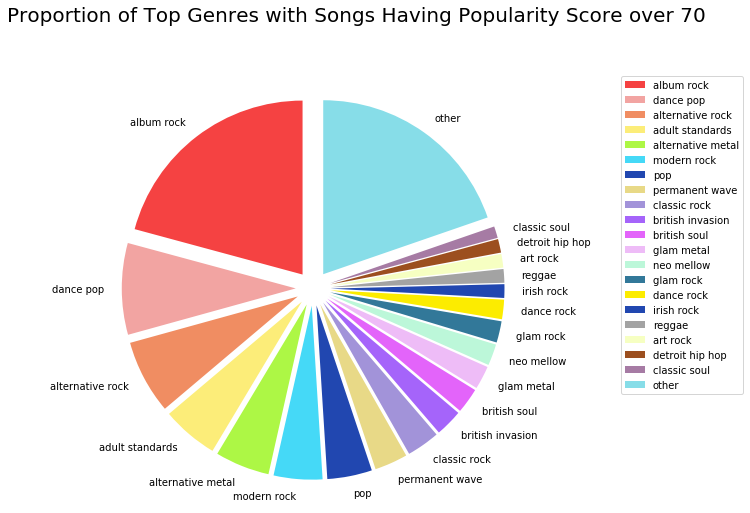

In [30]:
#plotting the proportion of top 20 populous genres and other genres of popular and hit songs

labels = list(top20_genres.T.index)
sizes = list(top20_genres.values)
explode = (0.1, 0.1, 0.1, 0.1,0.1,0.1, 0.1, 0.1, 0.1,0.1,0.1, 0.1, 0.1, 0.1,0.1,0.1, 0.1, 0.1, 0.1,0.1,0.1)  # explode 1st slice
colors = ['#f54242', '#f2a4a2', '#f08d62','#fced79', '#adf745', '#45d9f7', '#2147b0', '#e8d987', '#a293d9','#a564fa', '#e364fa', '#eebcf7'
          ,'#bcf7d9', '#327899', '#fcec00', '#2147b0', '#a3a3a3', '#f6ffc2', '#9c4f1f', '#a67ba4', '#87dde8']

plt.pie(sizes, labels=labels, colors = colors ,explode=explode, startangle   = 90)
plt.legend(bbox_to_anchor=(1.5,1))

fig = plt.gcf()
fig.set_size_inches(8,8)
plt.title('Proportion of Top Genres with Songs Having Popularity Score over 70', fontsize=20)
space = plt.gca()
space.title.set_position([0.6, 1.1])

plt.show()

- We can see from the pie chart that genre "album rock" is the most popular genre in popular and hit songs, with approximately 20% of total songs, nearly triple the proportion of the genres coming in the second and third place
- "dance pop" and "alternative rock" genres come at the second and third place with the slightly difference in the proportions of number of song compared to each other
- "detroit hip hop", "art rock", "irish rock", "reggae", and "electro" come in the last places of top 20 most populous genres in the popular and hit songs
- "other" genres, which are the genres not being in top 20 most poulous genres in popular and hit songs when added up together forming a considerably large proportion, just slightly smaller than the proportion of "album rock" - the most populous genre.

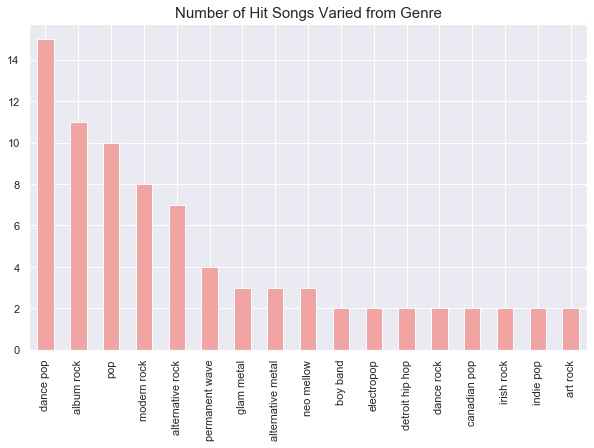

In [51]:
#Top genres with high popularity songs (>=80)
plt.title("Number of Hit Songs Varied from Genre", fontsize = 15)
hit_df_80['Genre'].value_counts()[:17].sort_values(ascending=False).plot(kind = "bar",figsize = (10, 6), color = '#f2a4a2')
plt.show()

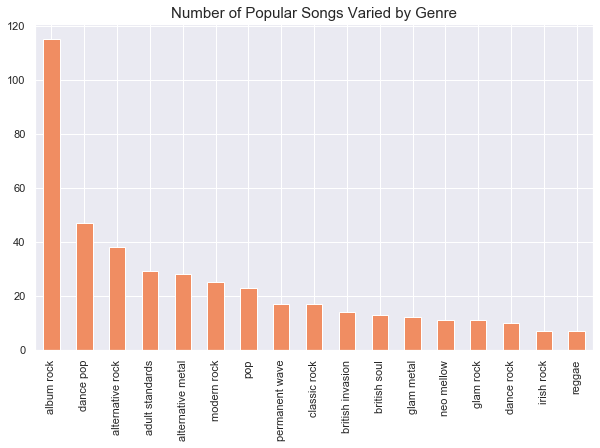

In [52]:
plt.title("Number of Popular Songs Varied by Genre", fontsize = 15)
popular_df_70 = df[df.Popularity >= 70]
popular_df_70['Genre'].value_counts()[:17].sort_values(ascending=False).plot(kind = "bar",figsize = (10, 6), color = '#f08d62')
plt.show()

=> At the range of greater or equal to 70 popularity score, Album Rock is the genre that is most likely to be popular

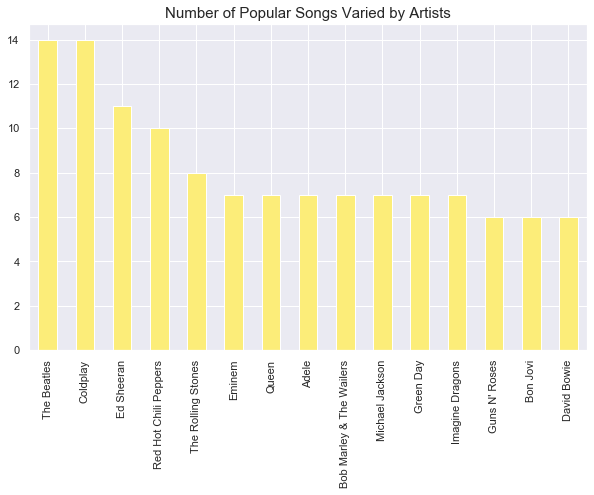

In [53]:
plt.title("Number of Popular Songs Varied by Artists", fontsize = 15)
popular_df_70['Artist'].value_counts()[:15].sort_values(ascending=False).plot(kind = "bar",figsize = (10,6), color = '#fced79')
plt.show()

=> The Beatles and Coldplay are the artists that are the most likely to have songs that is popular with 14 songs with higher than 70 popularity

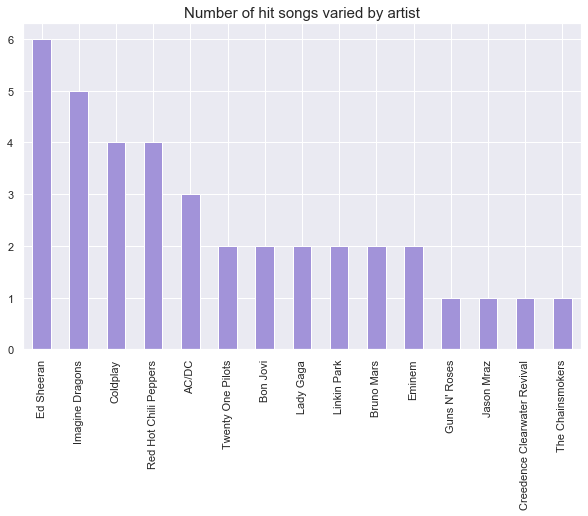

In [50]:
plt.figure(4, figsize= (15,8))
hit_df_80['Artist'].value_counts()[:15].sort_values(ascending=False).plot(kind = "bar",figsize = (10,6), color = '#a293d9')
plt.title("Number of hit songs varied by Artists", fontsize = 15)
plt.show()

=> At the range of greater or equal to 80 popularity score, Ed Sheeran is the artist that is most likely to create a hit song

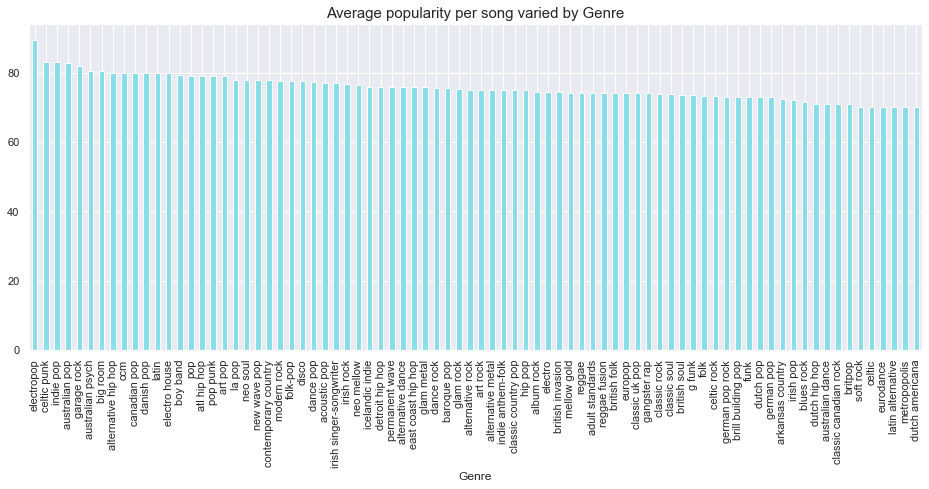

In [54]:
avgScore = popular_df_70.groupby('Genre')['Popularity'].mean()
avgScore.sort_values(ascending=False).plot(kind = "bar",figsize = (16,6), color = '#87dde8')
plt.title("Average popularity per song varied by Genres", fontsize = 15)
plt.show()

=> However, Electropop is the genre with the highest average of popularity per song at the rate of 89.5 popularity point per song

#### Create Scatterplots to examine if any pair of songs' features has a direct relationship:

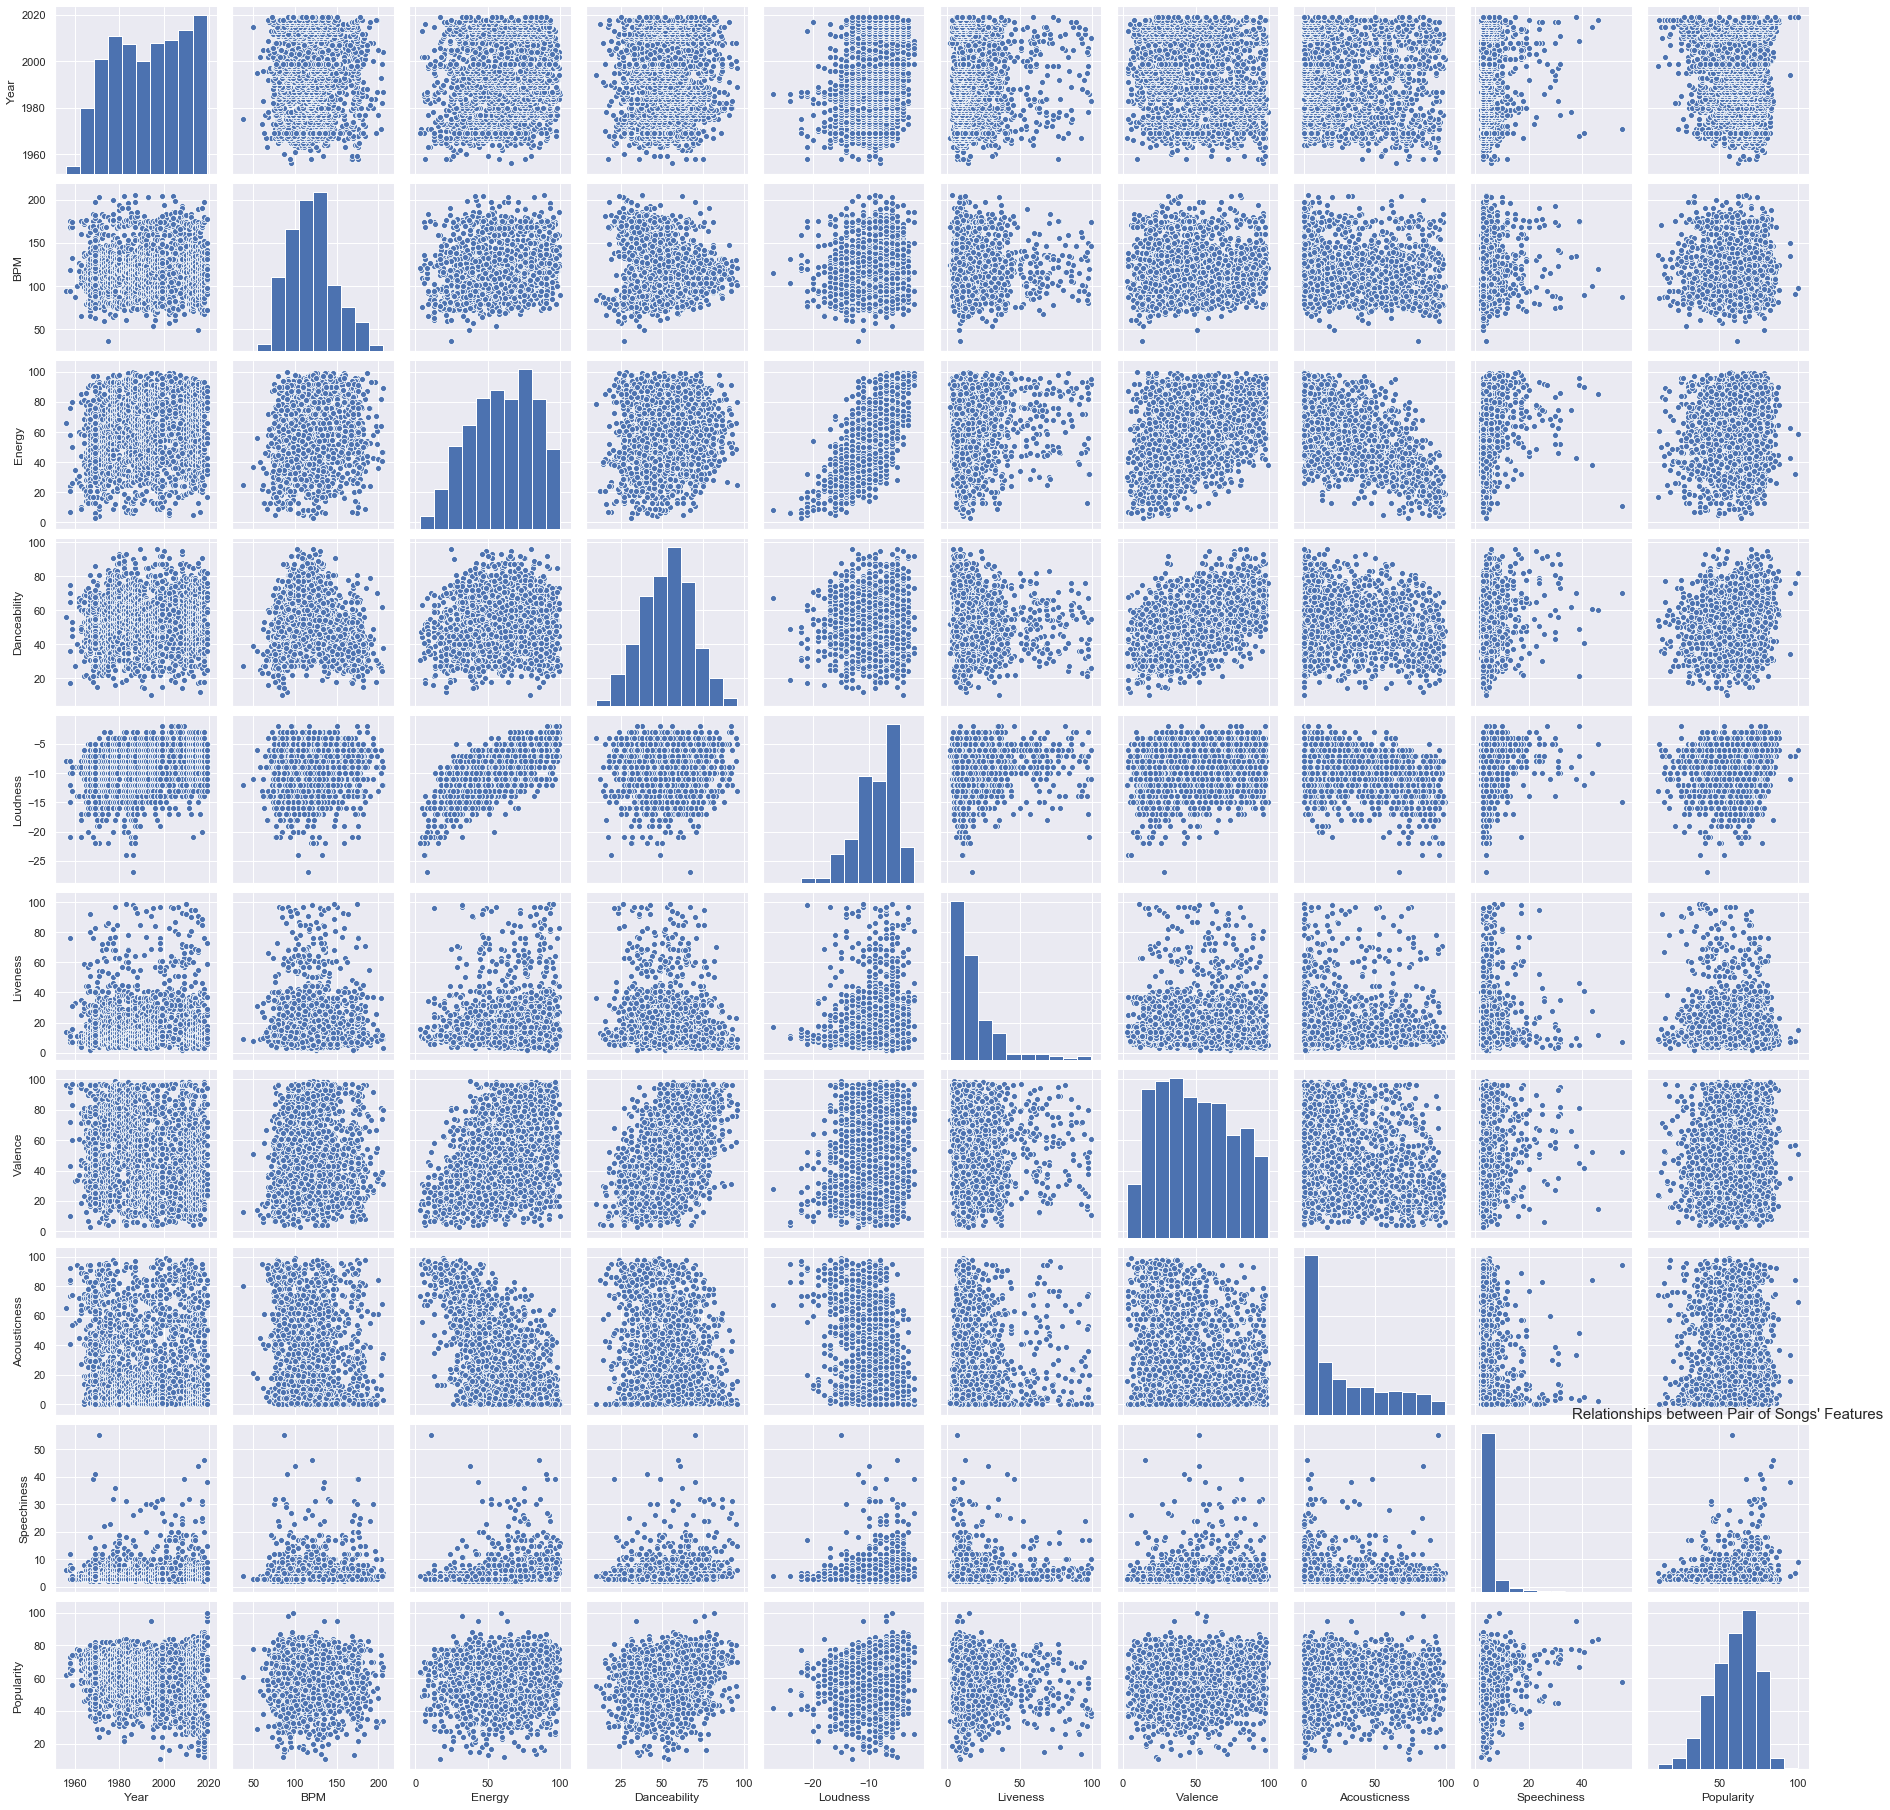

In [55]:
scatterplots = sns.pairplot(df)
scatterplots
plt.show()
#plotting pair scatterplots for all features in the dataset

- From the graphs above, we can see that there are direct relationships between the "Valence" and "Danceability", "Valence" and "Energy", and "Loudness" and "Energy"

#### Identify relationship between features including BPM, energy, loudness and songs’ popularity:

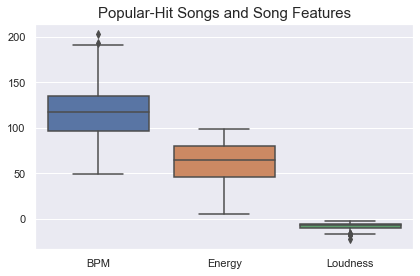

In [61]:
#plot boxplot of the popular and hit songs with the song features of BPM, Energy, and Loudness
sns.boxplot(data=popular_df_70.iloc[:,[4,5,7]])
sns.set()
plt.title('Popular-Hit Songs and Song Features', fontsize = 15)
plt.tight_layout()

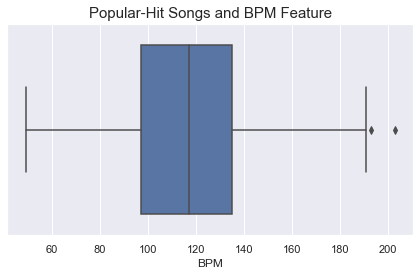

In [60]:
#plot boxplot of the popular and hit songs with the feature of BPM
sns.boxplot(popular_df_70.BPM)
sns.set()
plt.title('Popular-Hit Songs and BPM Feature', fontsize = 15)
plt.tight_layout()

- We can see that the interquartile range of BPM feature in Popular-Hit songs are approximately from over 95 to under 135
- The majority (about 50%) Popular-Hit Songs have the BPM values from over 95 to under 135
- There are outliers at the values of over 190 (BPM)

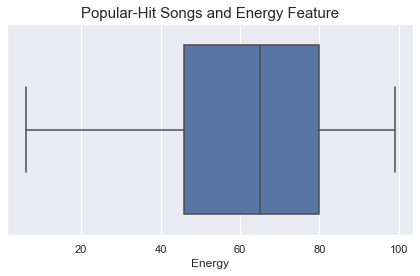

In [59]:
#plot boxplot of the popular and hit songs with the feature of Energy
sns.boxplot(popular_df_70.Energy)
sns.set()
plt.title('Popular-Hit Songs and Energy Feature', fontsize = 15)
plt.tight_layout()

- We can see that the interquartile range of Energy feature in Popular-Hit songs are approximately from over 40 to 80
- The majority (about 50%) Popular-Hit Songs have the Energy values from over 40 to 80

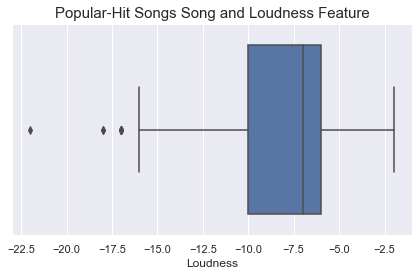

In [58]:
#plot boxplot of the popular and hit songs with the feature of Loudness
sns.boxplot(popular_df_70.Loudness)
sns.set()
plt.title('Popular-Hit Songs Song and Loudness Feature', fontsize = 15)
plt.tight_layout()

- We can see that the interquartile range of Loudness feature in Popular-Hit songs are approximately from -10 (dB) to under -5 (dB)
- The majority (about 50%) Popular-Hit Songs have the Loudness values from -10 (dB) to under -5 (dB)
- There are outliers at the values of under -16 (dB)

#### Identify relationship between valence and danceability of Popular and Hit songs:

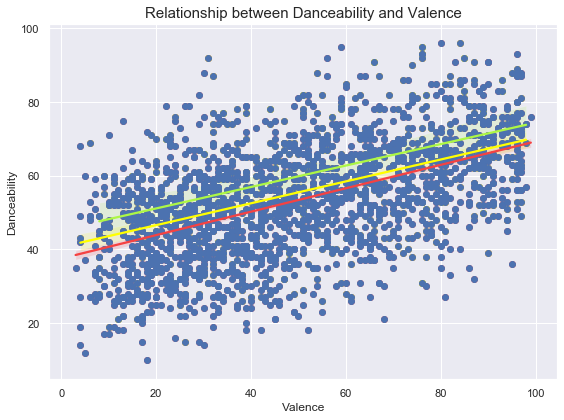

In [56]:
#Graph the best fit line of the relationship of Valence and Danceability

plt.figure(1, figsize=(8,6))
plt.title("Relationship between Danceability and Valence", fontsize = 15)
plt.plot(df['Valence'],df['Danceability'],'o')

#Best fit line for Spotify2000 Dataframe (Red line)
sns.regplot(df['Valence'],df['Danceability'] , color = '#f54242')
#Best fit line for Hit_df_80 Dataframe (Green line)
sns.regplot(hit_df_80['Valence'],hit_df_80['Danceability'], color = '#adf745')
#Best fit line for Popular_df_70 Dataframe (Yellow line)
sns.regplot(popular_df_70['Valence'], popular_df_70['Danceability'], color ='#ffff00')

plt.tight_layout()

- From this graph we can see the strong positive correlation between Valence and Danceability. For popular and hit songs, they have a higher average of danceability than all songs' average in the database
- The more positive the song, the more likely the song is danceable to

#### Identify relationship between valence and energy of Popular and Hit songs:

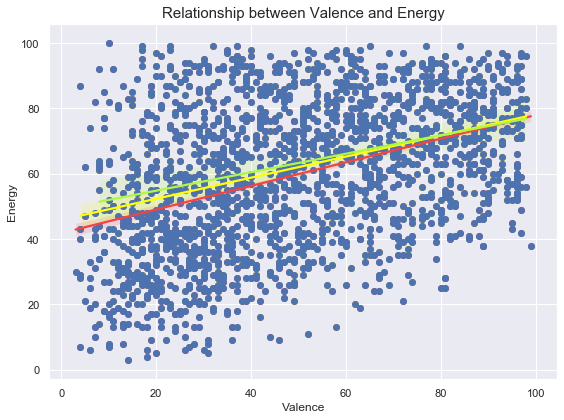

In [57]:
#Graph the best fit line of the relationship of Valence and Energy
#Popular_df is a Dataframe of songs that has a minimum of 80 in Popularity score

plt.figure(2,figsize=(8,6))
plt.title("Relationship between Valence and Energy", fontsize = 15)
plt.plot(df['Valence'],df['Energy'],'o')
#Best fit line for Spotify2000 Dataframe (Red line)
sns.regplot(df['Valence'],df['Energy'], color = '#f54242' )
#Best fit line for popular_df_70 (Yellow Line)
sns.regplot(popular_df_70['Valence'],popular_df_70['Energy'], color = '#ffff00' )
#Best fit line for hit_df_80 Dataframe (Green line)
sns.regplot(hit_df_80['Valence'],hit_df_80['Energy'], color = '#adf745')
plt.tight_layout()

- From this graph we can see the strong positive correlation between Valence and Energy
- For popular and hit songs, they have a higher average of energy score than all songs in the database. - However, this diffence is not noticable when the song is more than 80 in valence score and 70 in energy score
- The more positive the song, the more likely the song is louder

### 8. Conclusion
---

From this project, we found that songs have different characteristics, and those factors and their relationships to each other had effects on their song’s popularity. We also learned that wrangling and cleaning data as well as choosing the right plots for our data are crucial steps that we need to do with any data. These actions will help us visualize and understand our data better.

In the future, we would like to look into larger song databases and attempt to extract better insights to explain the reason why some songs are hit and some are not. People in the music industry can use these analytics to compose and perform the songs more according to the taste of their audience.

### 9. References

Singh, S. (2020, February 04). Spotify - All Time Top 2000s Mega Dataset. Retrieved May 22, 2020, from https://www.kaggle.com/iamsumat/spotify-top-2000s-mega-dataset.
We acquired the attributes’ definitions from Spotify for Developer websites: https://developer.spotify.com/documentation/web-api/reference/tracks/get-track/ https://developer.spotify.com/documentation/web-api/reference/tracks/get-audio-features/